In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import re

seed_0 ddpg
3648.12
seed_1 ddpg
3644.83
seed_0 td3
3783.96
seed_1 td3
3726.65
sac 3566.0
tqc 3645.03


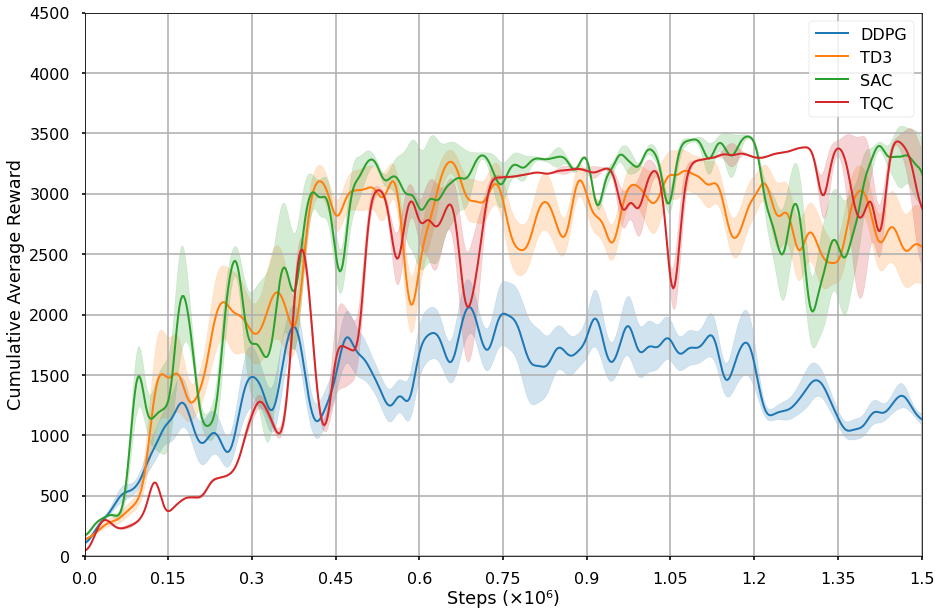

In [52]:
plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (15,10)
sigma = 4
path = 'E:\\mostafa\\PhD\\COMP579\\project\\codes\\final\\'
alpha = .4
algos = ['ddpg','td3']
for algo in algos:
    seeds = os.listdir(f'{path}\\{algo}\\runs')
    results = []
    for seed in seeds:
        print(seed + ' ' + algo)
        result = []
        d = {}
        log_path = f'{path}\\{algo}\\runs\\{seed}\\log.log'
        with open(log_path) as f:
            for line in f:
                try:
                    (timestep, res) = line.split(', ')
                    result.append(float(''.join(c for c in res if (c.isdigit() or c =='.'))))
                except:
                    pass
        results.append(result)
        print(np.array(result).max())
    mean = np.mean(np.array(results),axis=0)
    std = np.std(np.array(results),axis=0)

    stepsize = 3000
    steps = range(0,len(mean)*stepsize, stepsize)
    mean = gaussian_filter1d(mean, sigma=sigma)
    std = gaussian_filter1d(std, sigma=4)
    p = plt.plot(steps,mean, label=algo.upper(), linewidth=2)
    plt.fill_between(steps, mean- alpha*std, mean+ alpha*std, color = p[-1].get_color() , alpha = 0.2)

for algo in ['sac', 'tqc']:
    with open(path+f'{algo}/log_colab.log', 'r') as f:
        a= ''.join([l for l in f.readlines() if l[0].isdigit()])
    b = a.replace(': Mean reward:','').replace(' +/-','').split('\n')
    x=[]
    y=[]
    stdd=[]
    for A in b:
        m = A.split(' ')
        x.append(np.array(m[0], dtype=float)*2500)
        y.append(np.array(m[1], dtype=float))
        stdd.append(np.array(m[2], dtype=float))

    x = np.array(x)
    y = np.array(y)
    stdd = np.array(stdd)
    print(algo, max(y))
    y = gaussian_filter1d(y, sigma=sigma)
    stdd = gaussian_filter1d(stdd, sigma=4)
    p = plt.plot(x,y, label=algo.upper() ,linewidth=2)
    plt.fill_between(x, y- stdd, y+ stdd, color = p[-1].get_color() , alpha = 0.2)
plt.legend()
plt.xlim(left=0,right=1.5e6)
plt.ylim(top=4500,bottom=0)
plt.xlabel('Steps (×10⁶)')
plt.ylabel('Cumulative Average Reward')
plt.grid(True)
plt.xticks(list(range(0,int(1.5e6)+1, 150000)),[str(i/1000000) for i in range(0,int(1.5e6)+1,150000)])
plt.savefig(path + 'plots\\accumulated rewards.png',facecolor='w', transparent=False)


td3 3618.8003592465357
ddpg 3618.8003592465357


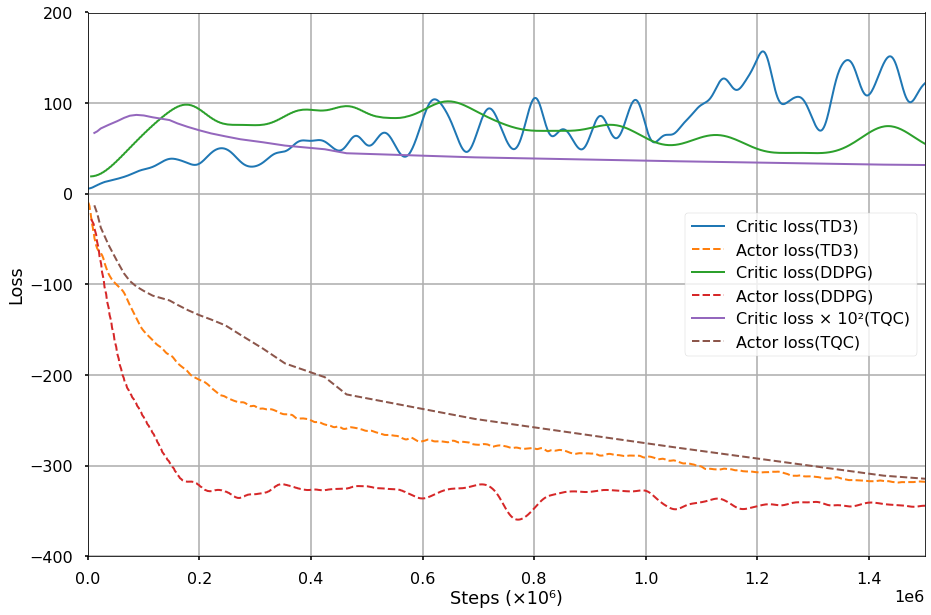

In [35]:

for algo in ['td3','ddpg']:
    i=0
    seeds = os.listdir(f'{path}\\{algo}\\runs')
    m2=[]
    for seed in seeds:
        with open(path+f'{algo}/runs/{seed}/results_loss.log', 'r') as f:
            a= ''.join([l for l in f.readlines() if l.startswith('t')])
        # timestep: 0, critic_loss: 1.4221938848495483, actor_loss -0.25472962856292725
        b = a.replace('timestep: ','').replace(', critic_loss: ',' ').replace(', actor_loss','').replace(':','').split('\n')
        # print([A.split(' ') for A in b])
        m = np.array([[A.split(' ')][0] for A in b if len(A.split(' ')[0])>1], dtype=float)
        m2.append(m[m[:, 0].argsort()])

    # print(m2[1].shape[0])
    minimum = np.minimum(m2[1].shape[0],m2[0].shape[0])
    m=(m2[0][:minimum,:]+m2[1][:minimum,:])/2

    x = m[:,0]
    if algo=='td3':
        critic_loss = m[:,1]
        actor_loss = m[:,2]
    else:
        critic_loss = m[:,2]
        actor_loss = m[:,1]


    print(algo, max(y))
    critic_loss = gaussian_filter1d(critic_loss, sigma=15)
    actor_loss = gaussian_filter1d(actor_loss, sigma=4)
    # if i%2==1:
    plt.plot(x,critic_loss, label=f'Critic loss({algo.upper()})' ,linewidth=2)
# else:
    plt.plot(x,actor_loss, '--', label=f'Actor loss({algo.upper()})',linewidth=2)
    # plt.show()
    # plt.show()
    # plt.fill_between(x, y- stdd, y+ stdd, color = p[-1].get_color() , alpha = 0.2)

for algo in [ 'tqc']:
    x=[]
    actor_loss=[]
    critic_loss=[]
    with open(path+f'{algo}/log_colab.log', 'r') as f:
        for line in f.readlines():
            if line.startswith('|'):
                if 'total_timesteps' in line:
                    x.append(int(line.split('|')[2]))
                elif 'actor_loss' in line:
                    actor_loss.append(np.array(line.split('|')[2],dtype=float))
                elif 'critic_loss' in line:
                    critic_loss.append(np.array(line.split('|')[2],dtype=float))

    x = np.array(x)
    actor_loss = np.array(actor_loss)
    critic_loss = np.array(critic_loss)
    actor_loss = gaussian_filter1d(actor_loss, sigma=sigma)
    critic_loss = gaussian_filter1d(critic_loss, sigma=4)
    p = plt.plot(x,critic_loss*100, label=f'Critic loss × 10²({algo.upper()})' ,linewidth=2)
    p = plt.plot(x,actor_loss, '--', label=f'Actor loss({algo.upper()})' ,linewidth=2)


plt.legend()
# plt.xlim(left=0,right=1.5e6)
# plt.ylim(top=4500,bottom=0)
plt.xlabel('Steps (×10⁶)')
plt.ylabel('Loss')
plt.xlim(left=0,right=1.5e6)
plt.ylim(top=200,bottom=-400)
plt.grid(True)
# plt.xticks(list(range(0,int(1.5e6)+1, 150000)),[str(i/1000000) for i in range(0,int(1.5e6)+1,150000)])
plt.savefig(path + 'plots\\loss.png',facecolor='w', transparent=False)


In [60]:
'|    n_updates       | 1731     |'.split('|')

['', '    n_updates       ', ' 1731     ', '']

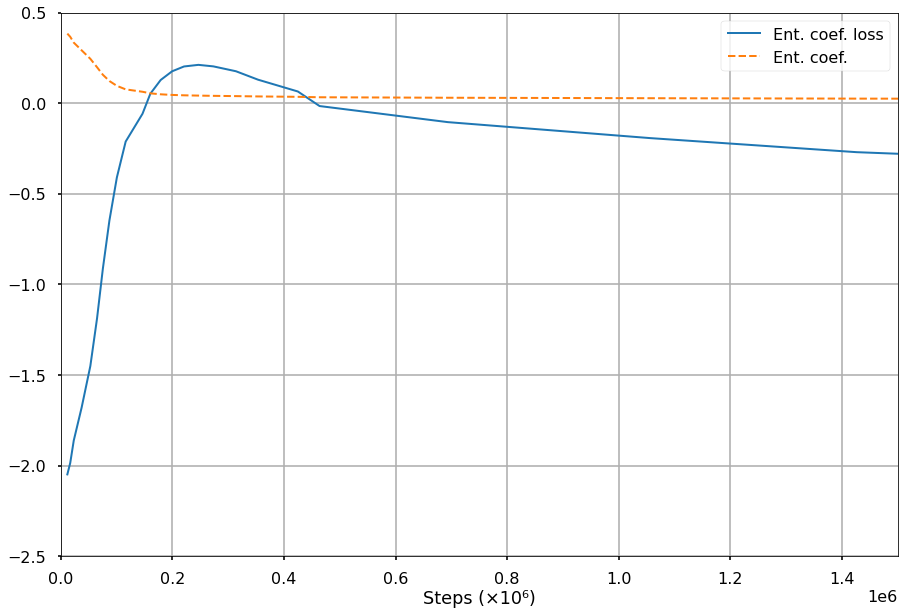

In [70]:
for algo in [ 'tqc']:
    x=[]
    ent_coef=[]
    ent_coef_loss=[]
    with open(path+f'{algo}/log_colab.log', 'r') as f:
        for line in f.readlines():
            if line.startswith('|'):
                # print(line)
                if '    total_timesteps ' in line.split('|'):
                    x.append(int(line.split('|')[2]))
                elif '    ent_coef        ' in line.split('|'):
                    ent_coef.append(np.array(line.split('|')[2],dtype=float))
                elif '    ent_coef_loss   ' in line.split('|'):
                    # print(line)
                    ent_coef_loss.append(np.array(line.split('|')[2],dtype=float))
    # print(critic_loss)
    x = np.array(x)
    ent_coef = np.array(ent_coef)
    ent_coef_loss = np.array(ent_coef_loss)
    ent_coef = gaussian_filter1d(ent_coef, sigma=sigma)
    ent_coef_loss = gaussian_filter1d(ent_coef_loss, sigma=4)
    p = plt.plot(x,ent_coef_loss, label=f'Ent. coef. loss' ,linewidth=2)
    p = plt.plot(x,ent_coef, '--', label=f'Ent. coef.' ,linewidth=2)


plt.legend()
# plt.xlim(left=0,right=1.5e6)
# plt.ylim(top=4500,bottom=0)
plt.xlabel('Steps (×10⁶)')
plt.ylabel('')
plt.xlim(left=0,right=1.5e6)
plt.ylim(top=.5,bottom=-2.5)
plt.grid(True)
# plt.xticks(list(range(0,int(1.5e6)+1, 150000)),[str(i/1000000) for i in range(0,int(1.5e6)+1,150000)])
plt.savefig(path + 'plots\\tqc_entloss.png',facecolor='w', transparent=False)


([<matplotlib.axis.XTick at 0x18cd9a6aa48>,
 [Text(0, 0, 'ddpg s₀'),
  Text(1, 0, 'ddpg s₁'),
  Text(2, 0, 'td3  s₀'),
  Text(3, 0, 'td3  s₁')])

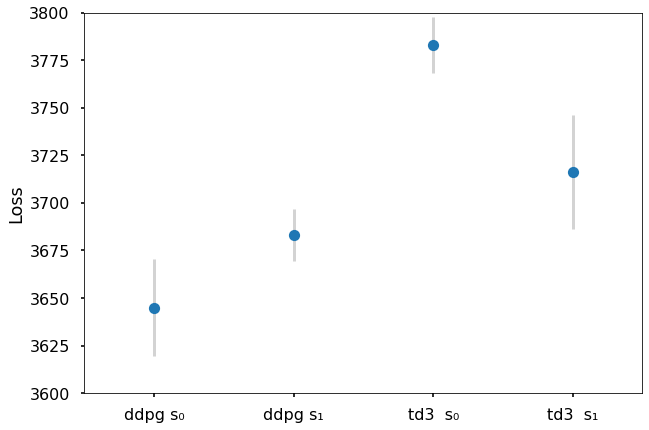

In [51]:
y=[3644.88,3683.30,3783.03,3716.00]
dy=([ 25.43,13.63,14.53,30.01])

plt.rcParams["figure.figsize"] = (10,7)
plt.errorbar(range(4), y, yerr=dy, fmt='o',
             ecolor='lightgray', elinewidth=3, capsize=5)
             
plt.ylabel('Loss')
plt.xlim(left=-.5,right=3.5)
plt.ylim(top=3800,bottom=3600)
# plt.grid(True)
plt.xticks(range(4), ['ddpg s₀','ddpg s₁', 'td3  s₀' , 'td3  s₁'])

In [ ]:
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 48.1     |
|    ep_rew_mean     | 70.6     |
| time/              |          |
|    episodes        | 600      |
|    fps             | 199      |
|    time_elapsed    | 9        |
|    total_timesteps | 16928    |
| train/             |          |
|    actor_loss      | -19.9    |
|    critic_loss     | 0.281    |
|    ent_coef        | 0.605    |
|    ent_coef_loss   | -2.19    |
|    learning_rate   | 0.0003   |
|    n_updates       | 1731     |
---------------------------------

(0.0, 0.4)

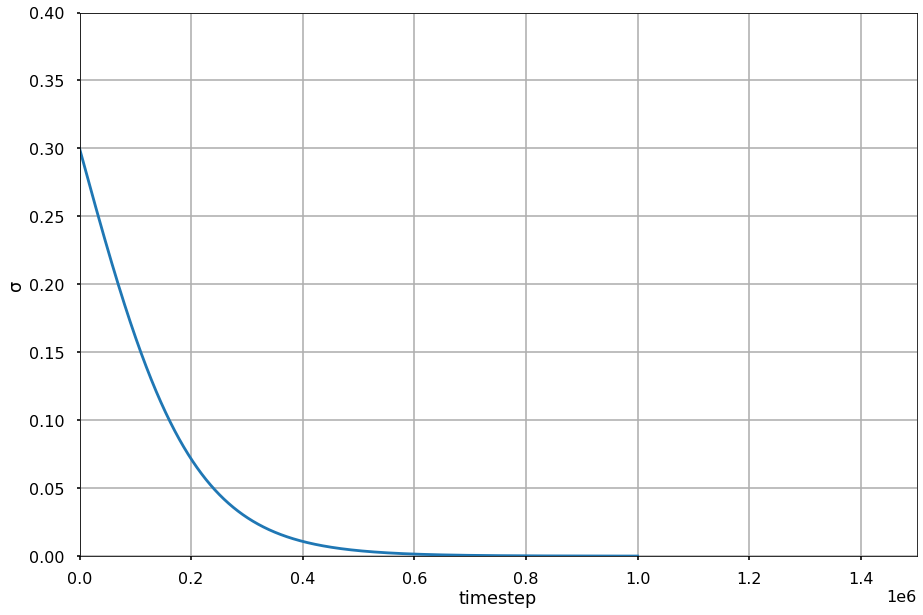

In [36]:
x = np.linspace(0,1e6,10000)
plt.plot(x, .3*(1-np.tanh(x/2e5)))
plt.xlabel('timestep')
plt.grid(True)
plt.ylabel('σ')
plt.xlim(left=0,right=1.5e6)
plt.ylim(top=.4,bottom=0)